In [1]:
%matplotlib inline

In [32]:
import sklearn
import sklearn.cluster as clustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import sklearn.metrics


In [3]:
combined_asos = pd.read_csv("/Users/seanfreeman/Dropbox/Teaching/Spring 2024/AES690ST/combined_asos_2023.csv")

In [4]:
combined_asos

,station,station_name,lat,lon,valid(UTC),tmpf,dwpf,sknt
0,AAF,APALACHICOLA MUNI (ASOS),29.7276,-85.0274,2023-01-01 05:00,61.0,62.0,1.0
1,AAF,APALACHICOLA MUNI (ASOS),29.7276,-85.0274,2023-01-01 06:00,60.0,61.0,1.0
2,AAF,APALACHICOLA MUNI (ASOS),29.7276,-85.0274,2023-01-01 07:00,59.0,60.0,3.0
3,AAF,APALACHICOLA MUNI (ASOS),29.7276,-85.0274,2023-01-01 08:00,59.0,60.0,1.0
4,AAF,APALACHICOLA MUNI (ASOS),29.7276,-85.0274,2023-01-01 09:00,58.0,60.0,1.0
...,...,...,...,...,...,...,...,...
6782526,ZZV,ZANESVILLE,39.9445,-81.8921,2023-12-31 19:00,42.0,33.0,9.0
6782527,ZZV,ZANESVILLE,39.9445,-81.8921,2023-12-31 20:00,42.0,34.0,7.0
6782528,ZZV,ZANESVILLE,39.9445,-81.8921,2023-12-31 21:00,42.0,34.0,6.0
6782529,ZZV,ZANESVILLE,39.9445,-81.8921,2023-12-31 22:00,41.0,34.0,4.0


In [17]:
stations_lls = combined_asos.groupby("station")[["lat", "lon", "tmpf", "dwpf", "sknt"]].mean()

In [18]:
conus_stations = stations_lls[np.logical_and(stations_lls['lat']<51, stations_lls['lat']>22) ]

In [19]:
conus_stations

,lat,lon,tmpf,dwpf,sknt
station,,,,,
AAF,29.7276,-85.0274,69.718930,62.461282,6.483027
AAO,37.7500,-97.2200,57.598114,43.011626,8.756212
AAT,41.4914,-120.5644,47.672982,30.984442,5.118520
ABE,40.6508,-75.4492,53.090377,40.998091,5.888916
ABI,32.4106,-99.6821,67.521357,47.850180,8.994525
...,...,...,...,...,...
XWA,48.2597,-103.7505,42.117055,31.769198,9.960373
YIP,42.2379,-83.5304,50.351765,40.401488,7.433487
YKM,46.5682,-120.5441,51.574471,35.076260,5.060062


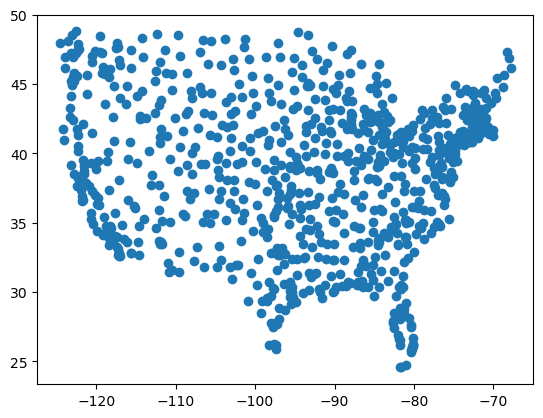

In [7]:
plt.scatter(conus_stations['lon'], conus_stations['lat'])

In [11]:
my_clustering = clustering.AgglomerativeClustering().fit(conus_stations)

In [12]:
my_clustering.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

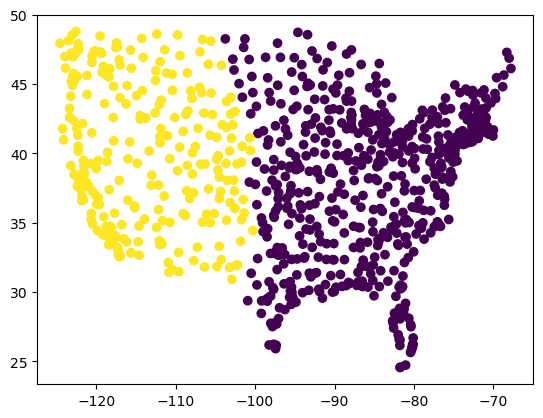

In [13]:
plt.scatter(conus_stations['lon'], conus_stations['lat'], c=my_clustering.labels_)

In [26]:
station_mean_vals = conus_stations.groupby('station')[['lat','lon','tmpf','dwpf', 'sknt']].mean()
station_mean_vals = station_mean_vals.dropna()

In [34]:
def custom_distance(vec_1, vec_2):
    # should be in the order we select.
    # so here should be temperature, dewpoint, wind speed
    temp_dist = np.power(5*(vec_1[0]-vec_2[0]),2)
    dewp_dist = np.power(vec_1[1]-vec_2[1],2)
    sknt_dist = np.power(0.5*(vec_1[2]-vec_2[2]),2)
    return temp_dist + dewp_dist + sknt_dist

# it will be passed as a matrix, so we will use
def sklearn_custom_distance(X):
    return sklearn.metrics.pairwise_distances(X, metric=custom_distance)


In [35]:
my_clustering = clustering.AgglomerativeClustering(metric=sklearn_custom_distance, n_clusters=5, linkage='average'
                                                   ).fit(station_mean_vals[['tmpf','dwpf', 'sknt']])

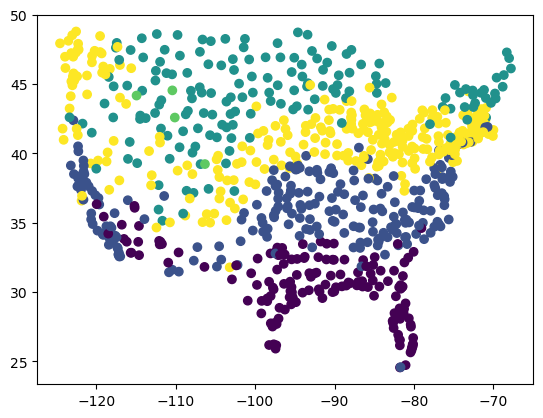

In [37]:
plt.scatter(station_mean_vals['lon'], station_mean_vals['lat'], c=my_clustering.labels_)